In [1]:
print("Hello World")

Hello World


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
warnings.filterwarnings('ignore')

In [3]:
DATASET_PATH='/Users/lokeshnagasaidarla/Developer/webdev/sleep-health-cardio-prediction/sleep-health-detection/dataset/'
df = pd.read_csv(os.path.join(DATASET_PATH, "sleep_lifestyle.csv"))

In [4]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [6]:
df['Sleep Disorder'].fillna('No Disorder',inplace=True)

In [9]:
df['Sleep Disorder Binary'] = df['Sleep Disorder'].apply(lambda x: 'Yes' if x != 'No Disorder' else 'No')

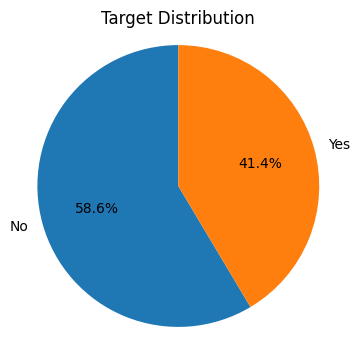

In [10]:
gender_counts = df['Sleep Disorder Binary'].value_counts()

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Target Distribution')
plt.axis('equal')
plt.show()

In [11]:
df.columns
df=df.drop(columns=['Person ID'])

In [12]:
no_slp_disorder=df['Sleep Disorder'].value_counts().to_frame().reset_index()
no_slp_disorder

,Sleep Disorder,count
0,No Disorder,219
1,Sleep Apnea,78
2,Insomnia,77


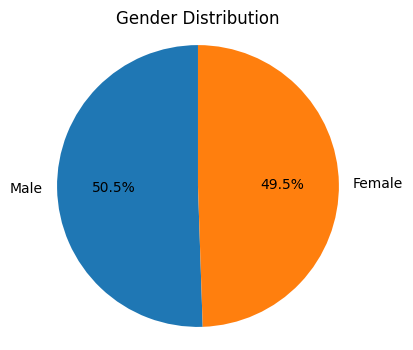

In [13]:
gender_counts = df['Gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

<Figure size 1000x600 with 0 Axes>

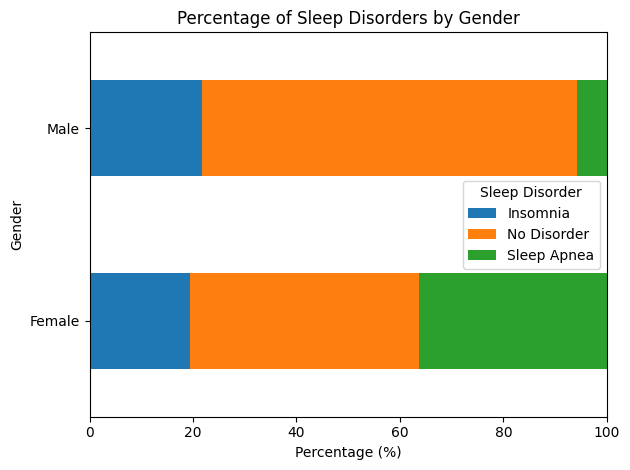

In [14]:
gender_target_counts = df.groupby(['Gender', 'Sleep Disorder']).size().unstack(fill_value=0)

# Normalizing to percentage
gender_target_percentages = gender_target_counts.div(gender_target_counts.sum(axis=1), axis=0) * 100

# Plotting
plt.figure(figsize=(10, 6))

gender_target_percentages.plot(kind='barh', stacked=True)

plt.title('Percentage of Sleep Disorders by Gender')
plt.xlabel('Percentage (%)')
plt.ylabel('Gender')
plt.legend(title='Sleep Disorder')
plt.xlim(0, 100)  
plt.tight_layout()
plt.show()

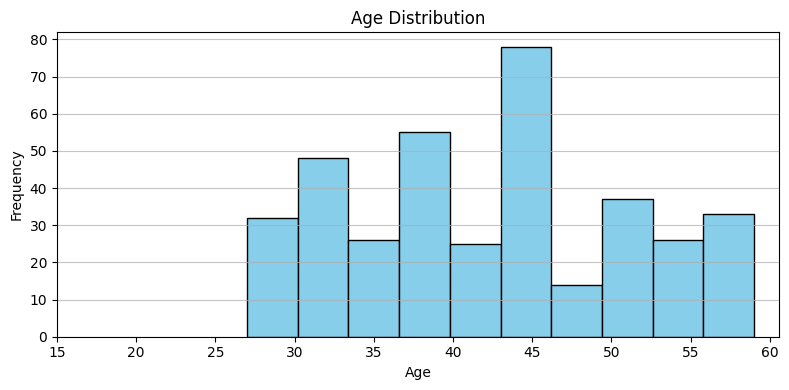

In [15]:
# Plotting the Histogram
plt.figure(figsize=(8, 4))
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(range(15, 65, 5))  # Adjust ticks based on your data range
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()


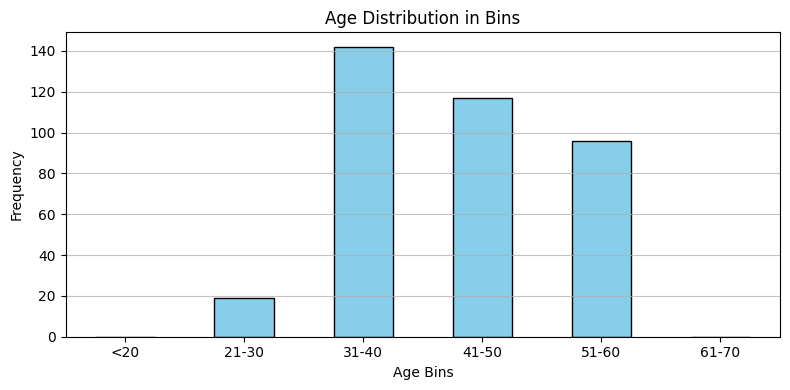

In [16]:
bins = [0, 20, 30, 40, 50, 60, 70]
labels = ['<20', '21-30', '31-40', '41-50', '51-60', '61-70']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Count occurrences in each bin
age_bin_counts = df['Age Group'].value_counts().sort_index()

# Plotting the Histogram of Binned Data
plt.figure(figsize=(8, 4))
age_bin_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Age Distribution in Bins')
plt.xlabel('Age Bins')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

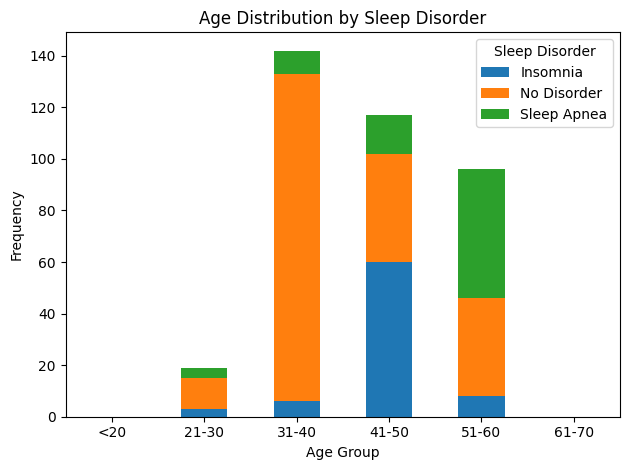

In [17]:
age_target_counts = df.groupby(['Age Group', 'Sleep Disorder']).size().unstack(fill_value=0)

# Plotting the Stacked Bar Chart
plt.figure(figsize=(10, 6))
age_target_counts.plot(kind='bar', stacked=True)

plt.title('Age Distribution by Sleep Disorder')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Keeps the x-axis labels horizontal
plt.legend(title='Sleep Disorder')
plt.tight_layout()
plt.show()

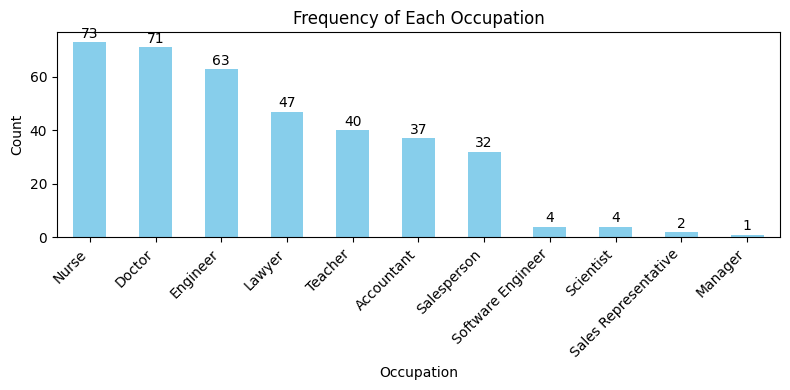

In [18]:
occupation_counts = df['Occupation'].value_counts()

# Print the number of unique occupations
num_unique_occupations = df['Occupation'].nunique()

# Plot a bar chart of occupation counts
plt.figure(figsize=(8, 4))
ax = occupation_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Each Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')

# Set x-tick labels to occupation names
ax.set_xticklabels(occupation_counts.index, rotation=45, ha='right')

# Annotate each bar with the count value
for idx, count in enumerate(occupation_counts):
    ax.text(idx, count + 0.5, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

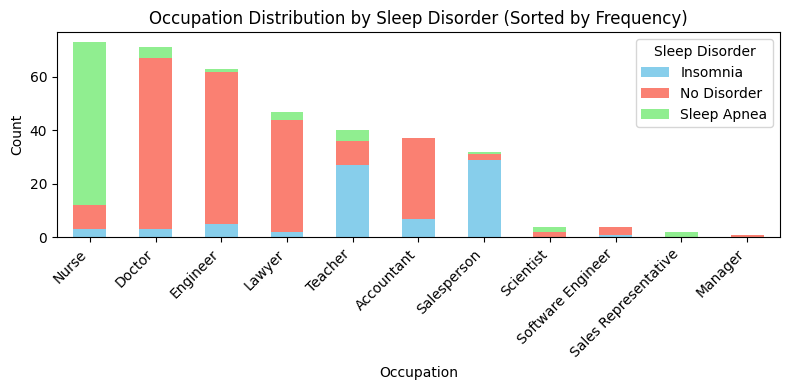

In [19]:
occupation_sleep_counts = df.groupby(['Occupation', 'Sleep Disorder']).size().unstack(fill_value=0)

# Sort by total frequency from low to high
occupation_sleep_counts = occupation_sleep_counts.loc[occupation_sleep_counts.sum(axis=1).sort_values(ascending=False).index]

# Plotting the stacked bar chart
plt.figure(figsize=(8, 4))
occupation_sleep_counts.plot(kind='bar', stacked=True, color=['skyblue', 'salmon', 'lightgreen'], ax=plt.gca())

# Adding titles and labels
plt.title('Occupation Distribution by Sleep Disorder (Sorted by Frequency)')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sleep Disorder')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

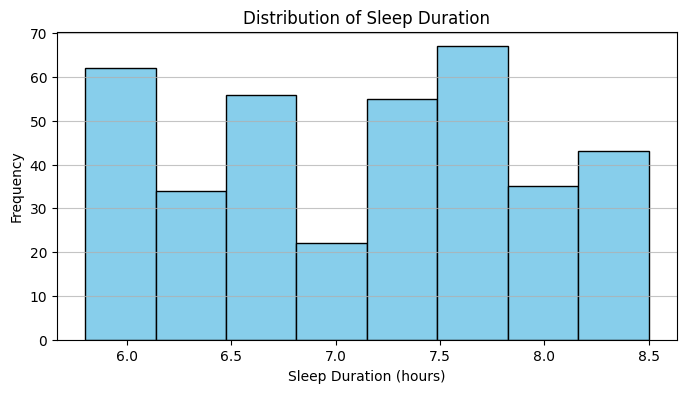

In [20]:
# Plotting histogram to show distribution of sleep durations
plt.figure(figsize=(8, 4))
plt.hist(df['Sleep Duration'], bins=8, color='skyblue', edgecolor='black')
plt.title('Distribution of Sleep Duration')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

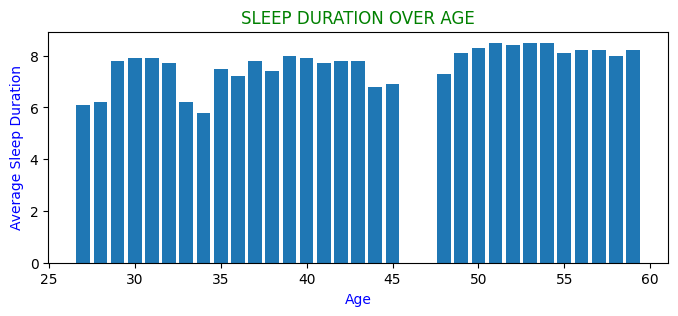

In [21]:
plt.figure(figsize=(8,3))
plt.title('SLEEP DURATION OVER AGE',color='g')
plt.xlabel('Age',color='b')
plt.ylabel('Average Sleep Duration',color='b')
plt.bar(df['Age'],df['Sleep Duration'])
plt.show()

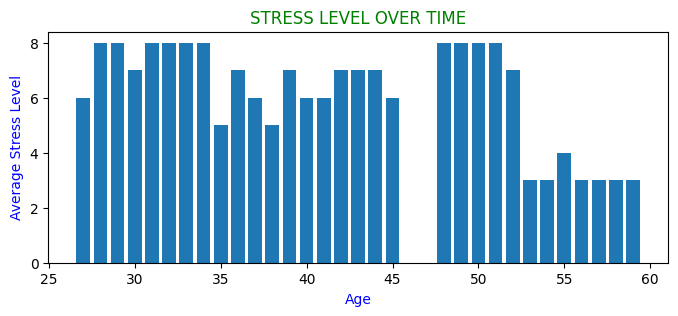

In [22]:
plt.figure(figsize=(8,3))
plt.title('STRESS LEVEL OVER TIME',color='g')
plt.bar(df['Age'],df['Stress Level'])
plt.xlabel('Age',color='b')
plt.ylabel('Average Stress Level',color='b')
plt.show()

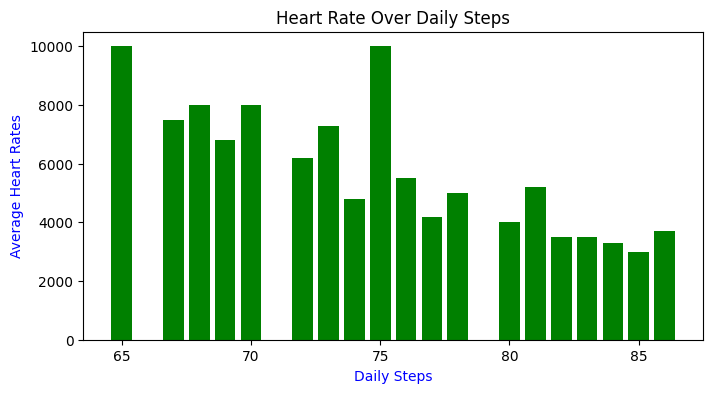

In [23]:
plt.figure(figsize=(8,4))
plt.title('Heart Rate Over Daily Steps',color='black')
plt.bar(df['Heart Rate'],df['Daily Steps'],color='g')
plt.xlabel('Daily Steps',color='b')
plt.ylabel('Average Heart Rates',color='b')
plt.show()

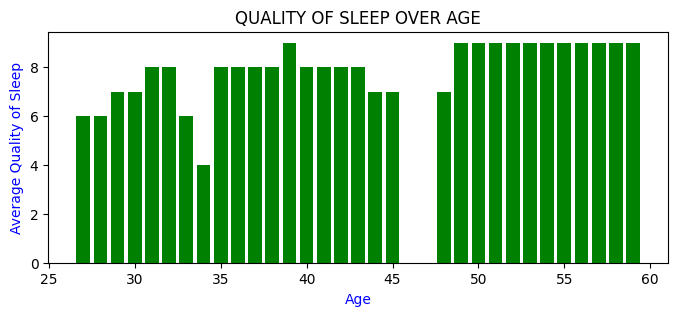

In [24]:
plt.figure(figsize=(8,3))
plt.title('QUALITY OF SLEEP OVER AGE')
plt.bar(df['Age'],df['Quality of Sleep'],color='g')
plt.xlabel('Age',color='b')
plt.ylabel('Average Quality of Sleep',color='b')
plt.show()

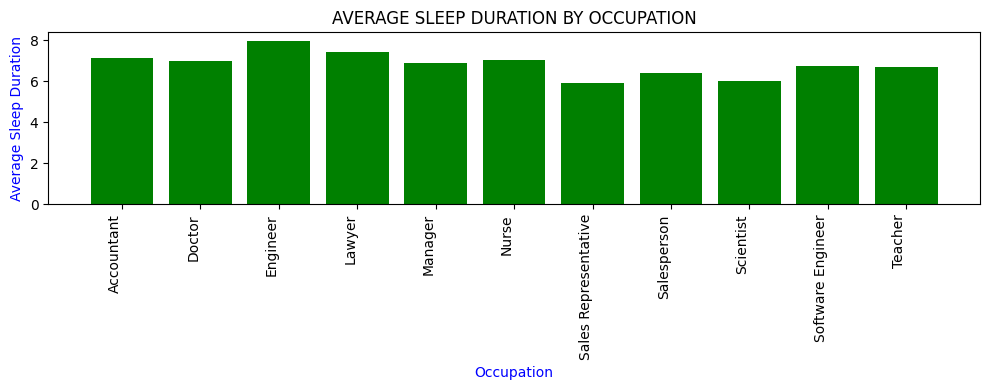

In [25]:
# Calculate the average sleep duration for each occupation
average_sleep_duration = df.groupby('Occupation')['Sleep Duration'].mean()

# Convert index to list for proper labeling
occupations = average_sleep_duration.index.tolist()
sleep_durations = average_sleep_duration.values

# Plot the bar chart
plt.figure(figsize=(10, 4))
plt.title('AVERAGE SLEEP DURATION BY OCCUPATION')
plt.bar(occupations, sleep_durations, color='g')
plt.xlabel('Occupation', color='b')
plt.ylabel('Average Sleep Duration', color='b')
plt.xticks(rotation=90, ha='right')  # Rotate occupation labels for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

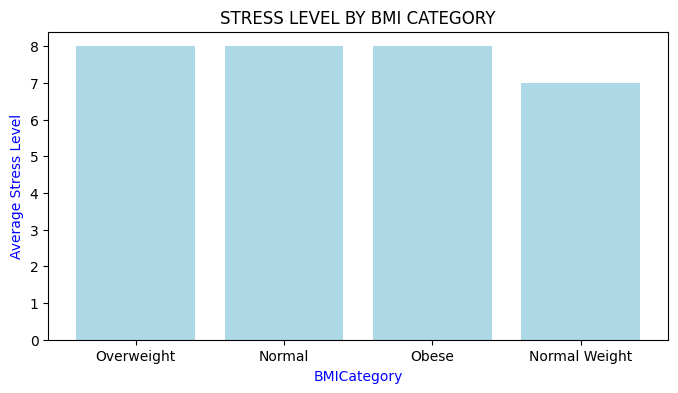

In [26]:
plt.figure(figsize=(8,4))
plt.title('STRESS LEVEL BY BMI CATEGORY')
plt.bar(df['BMI Category'],df['Stress Level'],color='lightblue')
plt.xlabel('BMICategory',color='b')
plt.ylabel('Average Stress Level',color='b')
plt.show()

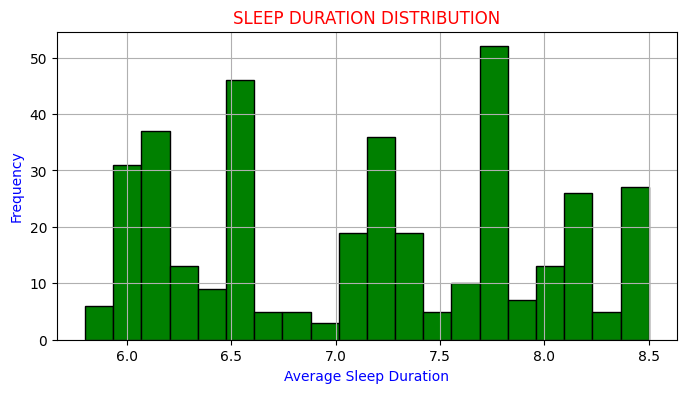

In [27]:
plt.figure(figsize=(8,4))
plt.title('SLEEP DURATION DISTRIBUTION',color='r')
plt.hist(df['Sleep Duration'],bins=20,color='g',edgecolor='black')
plt.xlabel('Average Sleep Duration',color='b')
plt.ylabel('Frequency',color='b')
plt.grid(True)
plt.show()

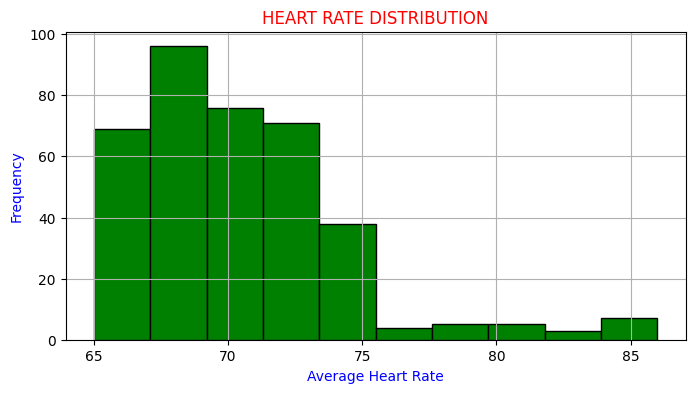

In [28]:
plt.figure(figsize=(8,4))
plt.title('HEART RATE DISTRIBUTION',color='r')
plt.hist(df['Heart Rate'],bins=10,color='g',edgecolor='black')
plt.xlabel('Average Heart Rate',color='b')
plt.ylabel('Frequency',color='b')
plt.grid(True)
plt.show()